In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Khám phá dữ liệu
df=pd.read_csv("Online Retail.csv")
df.head(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
#Nhận thấy có những đơn hàng mà số sản phẩm là âm (đây là những đơn hàng đã bị cancel, InvoiceNo có chữ "c")
df[df['Quantity']<0].head()
#Loại bỏ những đơn hàng đã bị hủy
df = df[df['Quantity']>0]
print(df[df['UnitPrice']<=0].head())
df = df[df['UnitPrice']>0]

     InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  01/12/2010 11:52        0.0   
1970    536545     21134         NaN         1  01/12/2010 14:32        0.0   
1971    536546     22145         NaN         1  01/12/2010 14:33        0.0   
1972    536547     37509         NaN         1  01/12/2010 14:33        0.0   
1987    536549    85226A         NaN         1  01/12/2010 14:34        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom  


In [5]:
# chuyển cột "InvoiceDate" sang định dạng date time
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],dayfirst=True)
print(df["InvoiceDate"].min(), df["InvoiceDate"].max())

2010-12-01 08:26:00 2011-12-09 12:50:00


In [6]:
#Tạo cột tháng
df["Month"] = df["InvoiceDate"].dt.month
#Lọc dữ liệu từ tháng 3 đến tháng 7
filtered_df = df[(df["Month"] >= 3) & (df["Month"] <= 7)]
print(filtered_df)

       InvoiceNo StockCode                          Description  Quantity  \
105335    545220     21955    DOORMAT UNION JACK GUNS AND ROSES         2   
105336    545220     48194                       DOORMAT HEARTS         2   
105337    545220     22556       PLASTERS IN TIN CIRCUS PARADE         12   
105338    545220     22139     RETROSPOT TEA SET CERAMIC 11 PC          3   
105339    545220    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         4   
...          ...       ...                                  ...       ...   
285416    561903     21900                       KEY FOB , SHED        24   
285417    561903     48187                  DOORMAT NEW ENGLAND         2   
285418    561903     85152      HAND OVER THE CHOCOLATE   SIGN         12   
285419    561903     82600                NO SINGING METAL SIGN        12   
285420    561903     21175          GIN + TONIC DIET METAL SIGN        12   

               InvoiceDate  UnitPrice  CustomerID         Country  Month  


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     24960
JUMBO BAG RED RETROSPOT               18167
ASSORTED COLOURS SILK FAN             16586
PACK OF 72 RETROSPOT CAKE CASES       15204
WHITE HANGING HEART T-LIGHT HOLDER    14584
PACK OF 60 PINK PAISLEY CAKE CASES    13207
SMALL POPCORN HOLDER                  12684
PARTY BUNTING                         12143
ASSORTED COLOUR BIRD ORNAMENT         11691
PACK OF 12 LONDON TISSUES             11049
Name: Quantity, dtype: int64


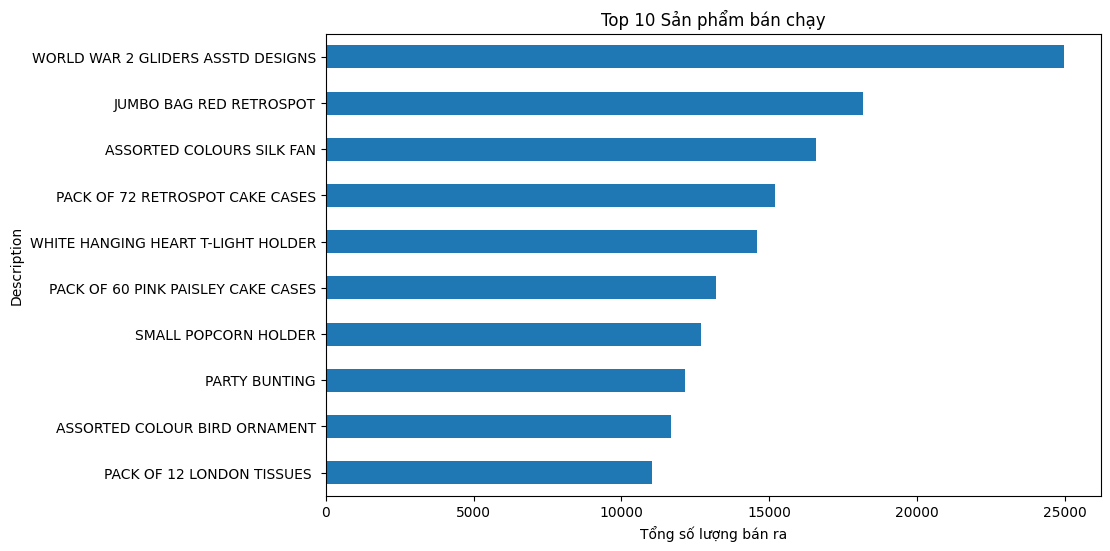

In [7]:
#Top 10 sản phẩm bán chạy
top_products = filtered_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)
# Biểu đồ cho thấy số lượng hàng hóa trong top 10 được bán
top_products.head(10).plot(kind='barh', figsize=(10,6), title='Top 10 Sản phẩm bán chạy')
plt.xlabel('Tổng số lượng bán ra')
plt.gca().invert_yaxis()  # đảo trục để sản phẩm bán chạy nhất nằm trên cùng
plt.show()

In [8]:
# Tính tần suất mua hàng của mỗi sản phẩm (số lượng được bán)
product_frequency = filtered_df.groupby('Description')['InvoiceNo'].nunique().sort_values(ascending=False)
# Hiện thị ra tần suất của top 10 sản phẩm
product_frequency.head(10)

Description
PARTY BUNTING                         985
WHITE HANGING HEART T-LIGHT HOLDER    905
JUMBO BAG RED RETROSPOT               844
REGENCY CAKESTAND 3 TIER              837
LUNCH BAG RED RETROSPOT               653
SPOTTY BUNTING                        569
ASSORTED COLOUR BIRD ORNAMENT         565
SET OF 4 PANTRY JELLY MOULDS          564
PACK OF 72 RETROSPOT CAKE CASES       552
LUNCH BAG SUKI DESIGN                 545
Name: InvoiceNo, dtype: int64

In [9]:
# Tính giá trị mua hàng trung bình mỗi đơn (Average Order Value)
filtered_df['TotalPrice'] = filtered_df['Quantity'] * filtered_df['UnitPrice']
aov = filtered_df.groupby('InvoiceNo')['TotalPrice'].sum().mean()
print(f'Giá trị đơn hàng trung bình: {aov:,.2f}')

Giá trị đơn hàng trung bình: 474.62


C:\Users\Admin'\AppData\Local\Temp\ipykernel_17792\2614116116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TotalPrice'] = filtered_df['Quantity'] * filtered_df['UnitPrice']


In [10]:
#Tần suất và giá trị mua hàng trung bình
customer_stats = filtered_df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',  # Tần suất mua hàng (số hóa đơn)
    'Quantity': 'sum',     # Tổng số lượng sản phẩm đã mua
    'UnitPrice': 'mean'    # Giá trị trung bình của sản phẩm
}).rename(columns={
    'InvoiceNo': 'Frequency',
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AveragePrice'
})

# Hiển thị kết quả
print(customer_stats.head())

            Frequency  TotalQuantity  AveragePrice
CustomerID                                        
12347.0            42            679      2.759762
12348.0             5            269      8.920000
12352.0            23            156     42.379565
12353.0             4             20      6.075000
12354.0            58            530      4.503793


In [15]:
#Xây dựng hệ thống gợi ý sản phẩm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
#Tạo ma trận tương quan giữa người dùng và sản phẩm
user_product_matrix = filtered_df.groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack().fillna(0)
user_product_matrix = user_product_matrix.astype(int)
user_product_matrix.to_csv("user_product_matrix", index=True)
# Ma trận tương đồng
user_similarity = cosine_similarity(user_product_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_product_matrix.index, columns=user_product_matrix.index)
print(user_similarity_df.head(10))

CustomerID   12347.0   12348.0   12352.0   12353.0   12354.0   12355.0  \
CustomerID                                                               
12347.0     1.000000  0.463464  0.000000  0.000000  0.005835  0.766668   
12348.0     0.463464  1.000000  0.000235  0.000000  0.000000  0.684126   
12352.0     0.000000  0.000235  1.000000  0.000000  0.001596  0.000000   
12353.0     0.000000  0.000000  0.000000  1.000000  0.000000  0.006211   
12354.0     0.005835  0.000000  0.001596  0.000000  1.000000  0.000000   
12355.0     0.766668  0.684126  0.000000  0.006211  0.000000  1.000000   
12356.0     0.001233  0.000000  0.000000  0.000000  0.016737  0.004176   
12358.0     0.000000  0.000420  0.002088  0.011152  0.000000  0.000000   
12359.0     0.040282  0.000000  0.000000  0.000000  0.018279  0.007084   
12360.0     0.068097  0.000370  0.001840  0.000000  0.151878  0.065914   

CustomerID   12356.0   12358.0   12359.0   12360.0  ...   18263.0   18265.0  \
CustomerID                      

In [ ]:
#Hệ thống gợi ý dựa trên khách hàng tương tự
def recommend_products(customer_id, user_similarity_df, user_product_matrix, top_n=5):
    # Lấy danh sách người dùng tương tự
    similar_users = user_similarity_df[customer_id].sort_values(ascending=False).index[1:]  # Bỏ chính người dùng đó
    similar_users_weights = user_similarity_df[customer_id].sort_values(ascending=False).iloc[1:]
    
    # Tính điểm gợi ý dựa trên người dùng tương tự
    recommendations = user_product_matrix.loc[similar_users].T.dot(similar_users_weights).sort_values(ascending=False)
    
    # Loại bỏ các sản phẩm mà người dùng đã mua
    already_purchased = user_product_matrix.loc[customer_id]
    recommendations = recommendations[already_purchased == 0]
    
    return recommendations.head(top_n)
# 4. Gợi ý sản phẩm cho một khách hàng cụ thể (ví dụ: CustomerID = 12347.0)
customer_id = 12347.0
recommended_products = recommend_products(customer_id, user_similarity_df, user_product_matrix)
print(f"Gợi ý sản phẩm cho khách hàng {customer_id}:")
print(recommended_products)

Gợi ý sản phẩm cho khách hàng 12347.0:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     533.719852
DOUGHNUT LIP GLOSS                    417.449766
PACK OF 72 RETROSPOT CAKE CASES       374.714204
ICE CREAM PEN LIP GLOSS               329.965421
PACK OF 60 PINK PAISLEY CAKE CASES    259.943669
dtype: float64


In [13]:
#Hệ thống gợi ý dựa trên sản phẩm tương tự
#Tính độ tương đồng giữa các sản phẩm 
item_similarity = cosine_similarity(user_product_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_product_matrix.columns, columns=user_product_matrix.columns)
#Gợi ý sản phẩm cho một sản phẩm cụ thể
def recommend_similar_items(product_name, item_similarity_df, top_n=5):
    # Lấy danh sách sản phẩm tương tự
    similar_items = item_similarity_df[product_name].sort_values(ascending=False).iloc[1:top_n+1]
    return similar_items

# 4. Gợi ý sản phẩm tương tự cho một sản phẩm cụ thể (ví dụ: "WHITE HANGING HEART T-LIGHT HOLDER")
product_name = "WHITE HANGING HEART T-LIGHT HOLDER"
recommended_items = recommend_similar_items(product_name, item_similarity_df)
print(f"Gợi ý sản phẩm tương tự cho '{product_name}':")
print(recommended_items)

Gợi ý sản phẩm tương tự cho 'WHITE HANGING HEART T-LIGHT HOLDER':
Description
GIN + TONIC DIET METAL SIGN           0.773976
FAIRY CAKE FLANNEL ASSORTED COLOUR    0.728101
TEA TIME TEA TOWELS                   0.728031
DOORMAT FAIRY CAKE                    0.550677
RED HANGING HEART T-LIGHT HOLDER      0.497785
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64


Trực quan hóa 

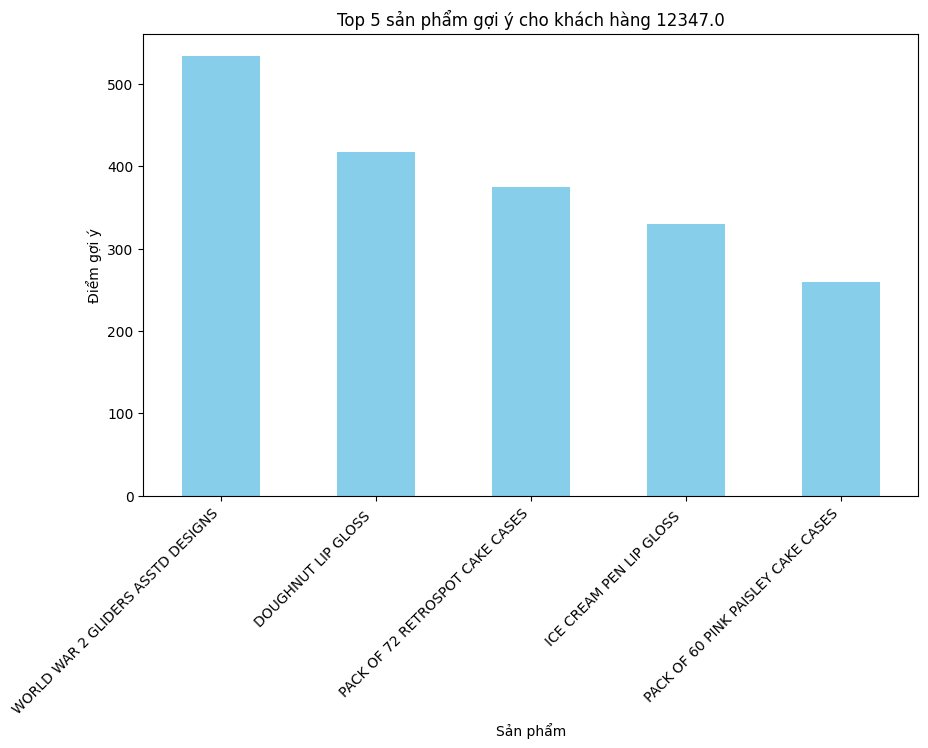

In [14]:
import matplotlib.pyplot as plt
# Gợi ý sản phẩm cho một khách hàng cụ thể
customer_id = 12347.0
if customer_id in user_product_matrix.index:
    recommended_products = recommend_products(customer_id, user_similarity_df, user_product_matrix)
    
    # Trực quan hóa top 5 sản phẩm gợi ý
    recommended_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title(f"Top 5 sản phẩm gợi ý cho khách hàng {customer_id}")
    plt.xlabel("Sản phẩm")
    plt.ylabel("Điểm gợi ý")
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print(f"CustomerID {customer_id} không tồn tại trong dữ liệu.")